In [0]:
#Spark NlP Demo 3-31 By Lindsay Gillespie 

# Spark NLP By Lindsay Gillespie
> Using PySpark for Natural Language Processing

- Cleaning
- processing
- charting

## Cleaning
- NLP Stopword removal
- remove all non letters

## Processing
- FlatMap from one to many (one line of text to many words)
  -cast everything to lowercase
  -strip whitespace from beginning and end
  -split by delimiter(space,comma)
- map() into intermediate key-value pairs
- filter() to get just some records
- reduceByKey() to get the count

## Charting

In [0]:
#demo from 4-5
# get text data from url
import urllib.request

urllib.request.urlretrieve("https://raw.githubusercontent.com/LinGill21/TextProcessing-pySpark/main/TheMysteriousAffairatStyles.txt" , "/tmp/Christie.txt")

Out[2]: ('/tmp/Christie.txt', <http.client.HTTPMessage at 0x7f6fb807a640>)

In [0]:
dbutils.fs.mv("file:/tmp/Christie.txt","dbfs:/data/Christie.txt")

Out[3]: True

In [0]:
christieRDD = sc.textFile("dbfs:/data/Christie.txt")

In [0]:
#step 1:flatmap each line to words
#step2: map() words to (words,1) intermediate key-value pairs
#step3: reduce by key to get(word,count)result
#Step4: collect() action tto get back to python

In [0]:
#Step 1:
wordsRDD=christieRDD.flatMap(lambda line : line.lower().strip().split(" "))

In [0]:
#step 2
import re
# remove punction
cleanTokensRDD = wordsRDD.map(lambda w: re.sub(r'[^a-zA-Z]','',w))
#remove stopwords
from pyspark.ml.feature import StopWordsRemover
remover =StopWordsRemover()
stopwords = remover.getStopWords()
cleanwordRDD=cleanTokensRDD.filter(lambda w: w not in stopwords)
#map words to key value pairs
IKVPairsRDD= cleanwordRDD.map(lambda word: (word,1))

In [0]:
#step 3
wordCountRDD = IKVPairsRDD.reduceByKey(lambda acc, value: acc+value)

In [0]:
#step 4
results = wordCountRDD.collect()
print(results)

[('mysterious', 5), ('', 2701), ('christie', 1), ('chapter', 14), ('go', 55), ('intense', 8), ('interest', 12), ('aroused', 8), ('public', 5), ('known', 21), ('somewhat', 9), ('nevertheless', 7), ('family', 9), ('account', 11), ('story', 13), ('effectually', 3), ('silence', 16), ('rumours', 3), ('persist', 1), ('briefly', 2), ('set', 11), ('circumstances', 6), ('led', 6), ('invalided', 1), ('home', 21), ('spending', 2), ('months', 4), ('rather', 62), ('convalescent', 2), ('leave', 21), ('near', 16), ('trying', 12), ('make', 52), ('mind', 55), ('ran', 12), ('john', 167), ('cavendish', 146), ('seen', 30), ('years', 16), ('indeed', 16), ('never', 81), ('particularly', 4), ('good', 75), ('fifteen', 5), ('senior', 1), ('though', 47), ('looked', 66), ('boy', 1), ('yarn', 1), ('ended', 3), ('mater', 3), ('delighted', 4), ('added', 13), ('keeps', 3), ('oh', 64), ('yes', 189), ('suppose', 28), ('know', 143), ('married', 10), ('showed', 7), ('johns', 15), ('father', 10), ('widower', 2), ('two', 80), ('certainly', 33), ('autocratic', 1), ('personality', 2), ('inclined', 7), ('charitable', 2), ('social', 1), ('bazaars', 1), ('lady', 25), ('countryplace', 1), ('mr', 179), ('ascendancy', 1), ('larger', 1), ('income', 1), ('arrangement', 2), ('unfair', 3), ('however', 18), ('always', 44), ('young', 31), ('remarriage', 3), ('thought', 64), ('qualified', 2), ('doctor', 19), ('profession', 4), ('medicine', 15), ('lived', 6), ('ambitions', 1), ('verses', 2), ('success', 3), ('barrister', 1), ('settled', 1), ('congenial', 1), ('country', 9), ('squire', 2), ('ago', 8), ('live', 5), ('shrewd', 2), ('preferred', 4), ('increase', 1), ('liked', 2), ('fall', 5), ('namely', 1), ('purse', 2), ('news', 6), ('rotten', 4), ('bounder', 1), ('said', 255), ('savagely', 1), ('tell', 72), ('making', 11), ('jolly', 3), ('us', 98), ('maters', 3), ('factotum', 1), ('companion', 2), ('trades', 1), ('sportold', 1), ('precisely', 6), ('say', 101), ('turned', 46), ('pretext', 1), ('something', 56), ('evies', 2), ('keen', 3), ('acknowledge', 2), ('absolute', 2), ('outsider', 1), ('anyone', 25), ('hes', 30), ('got', 29), ('boots', 4), ('weathers', 1), ('took', 58), ('secretaryyou', 1), ('societies', 1), ('useful', 3), ('knocked', 3), ('feather', 1), ('three', 12), ('suddenly', 41), ('alfred', 65), ('engaged', 5), ('must', 92), ('twenty', 3), ('areshe', 1), ('situation', 2), ('thus', 3), ('came', 65), ('days', 14), ('st', 5), ('mary', 72), ('station', 3), ('apparent', 4), ('existence', 3), ('midst', 1), ('green', 19), ('fields', 2), ('waiting', 8), ('platform', 1), ('piloted', 1), ('petrol', 1), ('activities', 1), ('situated', 2), ('miles', 6), ('mile', 2), ('july', 12), ('flat', 1), ('afternoon', 34), ('sun', 2), ('seemed', 39), ('impossible', 13), ('believe', 51), ('far', 22), ('away', 46), ('felt', 18), ('strayed', 1), ('world', 9), ('lodge', 6), ('gates', 7), ('im', 39), ('quiet', 10), ('drill', 1), ('volunteers', 1), ('week', 5), ('farms', 1), ('milk', 2), ('steadily', 2), ('glanced', 10), ('watch', 6), ('wonder', 10), ('weve', 8), ('shell', 1), ('started', 10), ('hospital', 10), ('daughter', 1), ('schoolfellow', 1), ('rascally', 1), ('solicitor', 2), ('cross', 4), ('tadminster', 15), ('seven', 10), ('spoke', 17), ('last', 73), ('fine', 10), ('house', 52), ('tweed', 1), ('flower', 5), ('straightened', 4), ('approach', 3), ('hullo', 3), ('heres', 3), ('wounded', 1), ('hero', 1), ('shook', 30), ('painful', 2), ('impression', 6), ('eyes', 45), ('sunburnt', 1), ('forty', 2), ('manly', 2), ('stentorian', 1), ('large', 9), ('sensible', 2), ('square', 1), ('encased', 1), ('thick', 4), ('conversation', 17), ('style', 1), ('weeds', 1), ('like', 61), ('even', 14), ('em', 1), ('careful', 11), ('sure', 45), ('youre', 15), ('todayinside', 1), ('cooped', 1), ('hire', 1), ('refreshed', 2), ('drawing', 1), ('way', 69), ('round', 25), ('shade', 4), ('sycamore', 1), ('figure', 7), ('rose', 16), ('steps', 2), ('meet', 8), ('slender', 2), ('form', 7), ('bright', 5), ('slumbering', 1), (

In [0]:
results.sort(key=lambda x:x[1])
results.reverse()
print(results[:20])
mostCommon=results[1:14]
word,count = zip(*mostCommon)

[('', 2701), ('poirot', 385), ('inglethorp', 259), ('said', 255), ('mrs', 231), ('one', 198), ('yes', 189), ('mr', 179), ('john', 167), ('cavendish', 146), ('know', 143), ('little', 123), ('well', 120), ('see', 114), ('room', 112), ('sir', 108), ('think', 105), ('quite', 103), ('cynthia', 102), ('say', 101)]

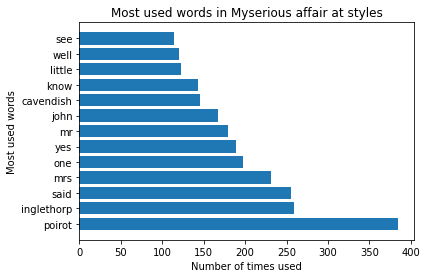

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.barh(word,count)
plt.xlabel("Number of times used")
plt.ylabel("Most used words")
plt.title("Most used words in Myserious affair at styles")
plt.show()